## Market basket analysis



### MLxtend apriori

"Mlxtend (machine learning extensions) is a Python library of useful tools for the day-to-day data science tasks"
[http://rasbt.github.io/mlxtend/](http://rasbt.github.io/mlxtend/)


---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This example uses MLxtend library by Sebastian Raschka.
# MLxtend userguide
# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Sales data from
# Http://archive.ics.uci.edu/ml/datasets/Online+Retail
# Citation request: Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197â€“208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).

data = pd.read_excel('retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
# REMOVE WHITE SPACE AND NULL
# Some lines, like linemaat = pd.Series(data['Country'].values.ravel()).unique() 40:' SET 2 TEA TOWELS I LOVE LONDON ' have leading and ending spaces
data['Description'] = data['Description'].str.strip() # remove white space
data['Description'].dropna() # drop rows that have NaN values


# List countries in the data. 'Ravel' returns a contiguous flattened array, 'unique' finds unique elements.
maat = pd.Series(data['Country'].values.ravel()).unique()
maat

# List all unique products
#tuotteet = pd.Series(data['Description'].values.ravel()).unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Malta', 'RSA'], dtype=object)

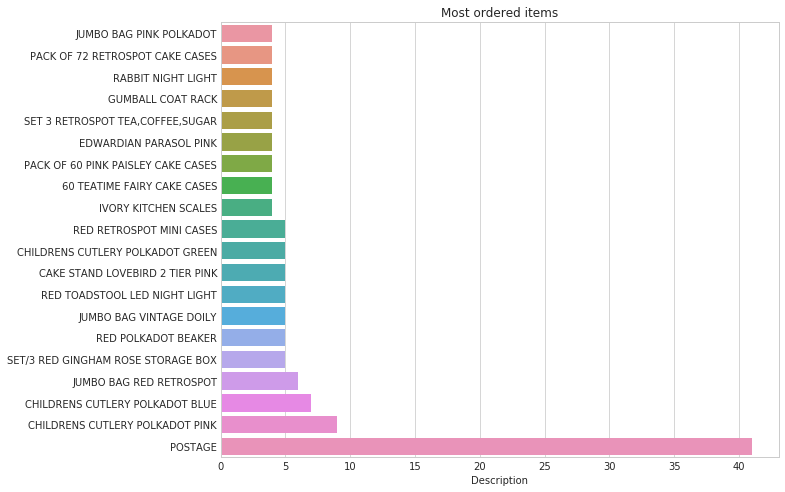

In [3]:
# VISUALISING

# Most sold items to 'country'
country = 'Finland'
items = data.loc[data['Country'] == country]


# visualising function
def visual(items):
    # get the 20 most sold items
    items = items['Description'].value_counts().head(20)
    # sort and reset index
    items = items.sort_values().reset_index()
    items = items.set_index('index')

    sns.set_style("whitegrid")
    # figure size
    dims = (10, 8)
    fig, ax = plt.subplots(figsize=dims)
    
    ax = sns.barplot(x=items.Description, y=items.index.values)
    ax.set_title("Most ordered items")
    plt.show()


visual(items)

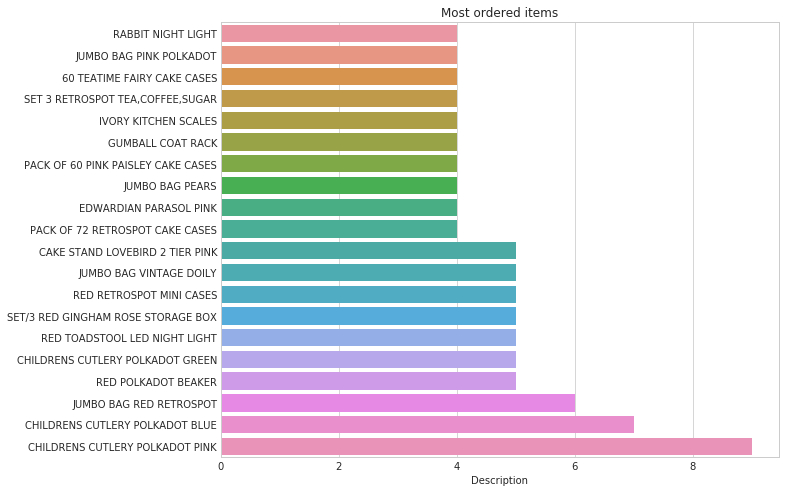

In [4]:
# Leave out POSTAGE
items = items.loc[items['Description'] != 'POSTAGE']

#visualise
visual(items)

# Count items per transaction to a new dataframe column "count"
#lista = items.groupby( ["InvoiceNo"] ).size().to_frame(name = 'count').reset_index()
#lista

In [5]:
# SELECT RELEVANT COLUMNS
# InvoiceNo, Description and Quantity

cols = ['InvoiceNo', 'Description','Quantity']
items = items[cols] # select from items, with columns "cols"
items.head()

,InvoiceNo,Description,Quantity
34083,539318,72 SWEETHEART FAIRY CAKE CASES,72
34084,539318,60 CAKE CASES DOLLY GIRL DESIGN,72
34085,539318,60 TEATIME FAIRY CAKE CASES,24
34086,539318,60 TEATIME FAIRY CAKE CASES,120
34087,539318,PACK OF 72 SKULL CAKE CASES,24


In [6]:
# Next we need to pivot the dataframe, so that all the items sold, will be columns and 
# transactions will be index numbers. So, if an item belongs to that transaction, it gets value 1.0, otherwise NaN
# The MLxtend's apriori needs an one-hot table(= all 0s and 1s).

# Pivot a level of the index labels with unstack, fill NaN values with 0
basket = items.groupby(['InvoiceNo'])['Description'].value_counts().unstack().fillna(0)
basket.head()

Description,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,3 GARDENIA MORRIS BOXED CANDLES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE WOODLAND,4 ROSE PINK DINNER CANDLES,4 SKY BLUE DINNER CANDLES,6 RIBBONS RUSTIC CHARM,60 CAKE CASES DOLLY GIRL DESIGN,...,WOODLAND STORAGE BOX LARGE,WOODLAND STORAGE BOX SMALL,WRAP ALPHABET DESIGN,WRAP COWBOYS,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP PINK FAIRY CAKES,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
539318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
544886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
545226,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# APRIORI
# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

# Select frequent itemsets with minimal SUPPORT of 'minsup'
minsup = 0.1  # = 10%
apri = apriori(basket, min_support=minsup, use_colnames=True)

# Add a 'Length' column, presenting number of items in itemset
apri['Length'] = apri['itemsets'].apply(len)

# Let's list itemsets with more than one item
apri[apri['Length'] > 1]

,support,itemsets,Length
10,0.111111,"[CHILDRENS CUTLERY POLKADOT BLUE, CHILDRENS CU...",2
11,0.133333,"[CHILDRENS CUTLERY POLKADOT BLUE, CHILDRENS CU...",2


In [8]:
# ASSOCIATION RULES
# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

# List rules with "lift" more than 6. You can also use "confidence"
rules = association_rules(apri, metric="lift", min_threshold=6.0)
rules

,antecedants,consequents,support,confidence,lift
0,(CHILDRENS CUTLERY POLKADOT GREEN),(CHILDRENS CUTLERY POLKADOT BLUE),0.111111,1.000000,6.428571
1,(CHILDRENS CUTLERY POLKADOT BLUE),(CHILDRENS CUTLERY POLKADOT GREEN),0.155556,0.714286,6.428571


The Frequent itemset '0' includes 'childrens cutlery polkadot blue' and 'childrens cutlery polkadot green'.

'Support' shows, that these items appear together in 15.6% of all "baskets". 

'Confidence' tells us, that if the antecedant is bought, how likely it is that also the consequent item is bought as well.

---

### MLxtend OnehotTransactions
Another way is to use MLxtend's OnehotTransactions to transform the dataframe suitable for 
apriori, but first we need to collect the data from dataframe, to a list of transactions lists


In [9]:
# Get items
items = data.loc[data['Country'] == country]
# Leave out POSTAGE
items = items.loc[items['Description'] != 'POSTAGE']
# remove white space
data['Description'] = data['Description'].str.strip() 
# drop rows that have NaN values
data['Description'].dropna()



# Group by 'InvoiceNo' and list keys of groups (group = InvoiceNo, including all it's items)
itemsit = items.groupby(['InvoiceNo'])
transactions = itemsit.groups.keys()

# create new list to hold transactions
basket_list = []

# iterate through all transactions
for key in transactions:
    basket = [] # list for items of a transaction(Invoice)
    values = itemsit['Description'].get_group(key).values
    #iterate all values of a transactions
    for value in values:
         # create a list containing current transaction's (key) items
         basket.append(value)

    # set the current transaction to dictionary, key = InvoiceNo / transaction
    basket_list.append(basket)

# show the first transaction
basket_list[0]

['72 SWEETHEART FAIRY CAKE CASES',
 '60 CAKE CASES DOLLY GIRL DESIGN',
 '60 TEATIME FAIRY CAKE CASES',
 '60 TEATIME FAIRY CAKE CASES',
 'PACK OF 72 SKULL CAKE CASES',
 'PACK OF 72 SKULL CAKE CASES',
 'PACK OF 12 LONDON TISSUES',
 'PACK OF 12 WOODLAND TISSUES',
 'PACK OF 12 SUKI TISSUES',
 'SWEETIES  STICKERS',
 'SET OF 72 SKULL PAPER  DOILIES',
 'SET OF 72 PINK HEART PAPER DOILIES',
 '60 CAKE CASES VINTAGE CHRISTMAS',
 '60 CAKE CASES VINTAGE CHRISTMAS',
 'PACK OF 60 PINK PAISLEY CAKE CASES',
 'PACK OF 60 PINK PAISLEY CAKE CASES']

In [10]:
from mlxtend.preprocessing import OnehotTransactions
# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

# MLxtend has OnehotTransactions-method, that turns the pivots values to 0s and 1s
oht = OnehotTransactions()

# fit and transform
ohtpivot = oht.fit(basket_list).transform(basket_list)
itemsoht = pd.DataFrame(ohtpivot, columns=oht.columns_)
itemsoht.head()

# now the data could be used with MLxtend's apriori, but we'll try Apyori instead

,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,3 GARDENIA MORRIS BOXED CANDLES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE WOODLAND,4 ROSE PINK DINNER CANDLES,4 SKY BLUE DINNER CANDLES,6 RIBBONS RUSTIC CHARM,60 CAKE CASES DOLLY GIRL DESIGN,...,WOODLAND STORAGE BOX LARGE,WOODLAND STORAGE BOX SMALL,WRAP ALPHABET DESIGN,WRAP COWBOYS,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP PINK FAIRY CAKES,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Apyori -library

In [13]:
# Apyori is another useful library that includes apriori

# Apyori:
# https://pypi.python.org/pypi/apyori/1.1.1


from apyori import apriori

# create associate rules on previously created "basket_list"
rules = apriori(basket_list, min_support = 0.1, min_confidence = 0.2, min_lift = 3, min_length = 2)

results = list(rules)
rulex = [list(x) for x in results]
rulex

[[frozenset({'CHILDRENS CUTLERY POLKADOT BLUE',
             'CHILDRENS CUTLERY POLKADOT GREEN'}),
  0.1111111111111111,
  [OrderedStatistic(items_base=frozenset({'CHILDRENS CUTLERY POLKADOT BLUE'}), items_add=frozenset({'CHILDRENS CUTLERY POLKADOT GREEN'}), confidence=0.7142857142857142, lift=6.428571428571428),
   OrderedStatistic(items_base=frozenset({'CHILDRENS CUTLERY POLKADOT GREEN'}), items_add=frozenset({'CHILDRENS CUTLERY POLKADOT BLUE'}), confidence=1.0, lift=6.428571428571429)]],
 [frozenset({'CHILDRENS CUTLERY POLKADOT BLUE',
             'CHILDRENS CUTLERY POLKADOT PINK'}),
  0.13333333333333333,
  [OrderedStatistic(items_base=frozenset({'CHILDRENS CUTLERY POLKADOT BLUE'}), items_add=frozenset({'CHILDRENS CUTLERY POLKADOT PINK'}), confidence=0.8571428571428571, lift=4.285714285714286),
   OrderedStatistic(items_base=frozenset({'CHILDRENS CUTLERY POLKADOT PINK'}), items_add=frozenset({'CHILDRENS CUTLERY POLKADOT BLUE'}), confidence=0.6666666666666666, lift=4.285714285714286

interpreting apyori's results is a bit more complicated than MLxtend's...